<a href="https://colab.research.google.com/github/nalrob/Procesamiento_de_datos/blob/main/Practica5_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis y manejo de datos nulos con U-Net con aprendizaje profundo y de máquina**


>Tipo de datos: Imágenes, en 2 clases


>¿Porque el metodo es el adecuado?

Luego de obtener una clasificación, con buena exactitud; el modelo de segmentación ayudará a profundizar y dar un enfoque más especifico a la técnica, lo que permitirá ubicar la zona especifica del fuego.


**> Creación de máscaras**

In [ ]:
pip install --upgrade scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Fire.zip to Fire.zip


In [ ]:
import zipfile
import io

with open('Fire.zip', 'wb') as f:
    f.write(uploaded['Fire.zip'])

data = zipfile.ZipFile(io.BytesIO(uploaded['Fire.zip']), 'r')
data.extractall()

In [ ]:
import zipfile
import os
import pandas as pd

# Ruta del archivo ZIP y directorio de extracción
zip_file_path = 'Fire.zip'  # Ruta del archivo ZIP
extract_path = '/content/Fire/Fire2/Fire2'  # Ruta donde se extraerán las imágenes

# Crear el directorio de extracción si no existe
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extraer el contenido del archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar los nombres de los archivos extraídos
extracted_files = os.listdir(extract_path)

# Crear un DataFrame para almacenar el nombre y la ruta de las imágenes
image_data = {
    'id': extracted_files,
    'path': [os.path.join(extract_path, file) for file in extracted_files]
}

# Crear el DataFrame
df = pd.DataFrame(image_data)

# Mostrar el DataFrame con los nombres y rutas de las imágenes
print(df)


                   id                                        path
0    non_fire.118.png  /content/Fire/Fire2/Fire2/non_fire.118.png
1     non_fire.53.png   /content/Fire/Fire2/Fire2/non_fire.53.png
2    non_fire.113.png  /content/Fire/Fire2/Fire2/non_fire.113.png
3         fire.12.png       /content/Fire/Fire2/Fire2/fire.12.png
4    non_fire.209.png  /content/Fire/Fire2/Fire2/non_fire.209.png
..                ...                                         ...
464      fire.181.png      /content/Fire/Fire2/Fire2/fire.181.png
465       fire.81.png       /content/Fire/Fire2/Fire2/fire.81.png
466   non_fire.76.png   /content/Fire/Fire2/Fire2/non_fire.76.png
467       fire.83.png       /content/Fire/Fire2/Fire2/fire.83.png
468      fire.279.png      /content/Fire/Fire2/Fire2/fire.279.png

[469 rows x 2 columns]


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import load_img


sns.set_style('darkgrid')

In [ ]:
import cv2
import numpy as np

def segment_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, thresholded = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
            segment_indices = np.where(thresholded > 0)
            segment_str = ' '.join([f'{y} {x}' for y, x in zip(segment_indices[0], segment_indices[1])])
        else:
            segment_str = None
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        segment_str = None
    return segment_str

df['segmentation'] = df['path'].apply(segment_image)

In [ ]:
import cv2

def get_image_size(image_path):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            return (height, width)
        else:
            return None
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

# Aplicar la función para obtener el tamaño y crear nuevas columnas 'height' y 'width'
df[['height', 'width']] = df['path'].apply(lambda x: pd.Series(get_image_size(x)))

<ipython-input-18-6d9d141f6f32>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df[['height', 'width']] = df['path'].apply(lambda x: pd.Series(get_image_size(x)))
<ipython-input-18-6d9d141f6f32>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df[['height', 'width']] = df['path'].apply(lambda x: pd.Series(get_image_size(x)))


In [ ]:
df['class'] = df['id'].apply(lambda x: 1 if x.startswith('fire') else 0)

df['type'] = df['class'].apply(lambda x: 'fire' if x == 1 else 'non_fire')

print(df)

                   id                                        path  \
0    non_fire.118.png  /content/Fire/Fire2/Fire2/non_fire.118.png   
1     non_fire.53.png   /content/Fire/Fire2/Fire2/non_fire.53.png   
2    non_fire.113.png  /content/Fire/Fire2/Fire2/non_fire.113.png   
3         fire.12.png       /content/Fire/Fire2/Fire2/fire.12.png   
4    non_fire.209.png  /content/Fire/Fire2/Fire2/non_fire.209.png   
..                ...                                         ...   
464      fire.181.png      /content/Fire/Fire2/Fire2/fire.181.png   
465       fire.81.png       /content/Fire/Fire2/Fire2/fire.81.png   
466   non_fire.76.png   /content/Fire/Fire2/Fire2/non_fire.76.png   
467       fire.83.png       /content/Fire/Fire2/Fire2/fire.83.png   
468      fire.279.png      /content/Fire/Fire2/Fire2/fire.279.png   

                                          segmentation  height   width  class  \
0    0 0 0 1 0 34 0 35 0 39 0 40 0 41 0 42 0 54 0 5...   519.0   699.0      0   
1    0 71

In [ ]:
dataset= df[['id', 'class', 'segmentation','path']]
dataset

,id,class,segmentation,path
0,non_fire.118.png,0,0 0 0 1 0 34 0 35 0 39 0 40 0 41 0 42 0 54 0 5...,/content/Fire/Fire2/Fire2/non_fire.118.png
1,non_fire.53.png,0,0 71 0 72 0 73 0 74 0 78 0 79 0 80 0 122 0 123...,/content/Fire/Fire2/Fire2/non_fire.53.png
2,non_fire.113.png,0,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...,/content/Fire/Fire2/Fire2/non_fire.113.png
3,fire.12.png,1,0 0 0 1 0 2 0 3 0 4 0 7 0 8 0 9 0 10 0 11 0 12...,/content/Fire/Fire2/Fire2/fire.12.png
4,non_fire.209.png,0,0 248 0 249 0 250 0 251 0 252 0 253 0 254 0 25...,/content/Fire/Fire2/Fire2/non_fire.209.png
...,...,...,...,...
464,fire.181.png,1,0 131 0 132 0 133 0 134 0 135 0 150 0 151 0 15...,/content/Fire/Fire2/Fire2/fire.181.png
465,fire.81.png,1,0 26 0 37 0 95 0 147 0 148 0 149 0 150 0 151 0...,/content/Fire/Fire2/Fire2/fire.81.png
466,non_fire.76.png,0,15 2 15 3 16 0 16 1 31 458 32 458 38 495 39 48...,/content/Fire/Fire2/Fire2/non_fire.76.png
467,fire.83.png,1,0 82 0 83 0 84 0 85 0 86 0 87 0 88 0 89 0 90 0...,/content/Fire/Fire2/Fire2/fire.83.png


Display images with mask

In [ ]:
nan_list = list(df['segmentation'].isnull())
not_nan_index = []

for i in range(len(nan_list)):
    if nan_list[i] == False:
        not_nan_index.append(i)

# Let's see how many indice we got
print('The number of index is:', len(not_nan_index))

The number of index is: 467


In [ ]:
all_class = ['fire', 'non_fire']

# The empty list below will be used to store all the indice of each class
fire = []
non_fire = []

for i in range(len(not_nan_index)):
    row = not_nan_index[i]
    if df.loc[row, 'type'] == all_class[0]:
        fire.append(not_nan_index[i])
    elif df.loc[row, 'type'] == all_class[1]:
         non_fire.append(not_nan_index[i])

In [ ]:
print(len(fire))
print(len(non_fire))

243
224


In [ ]:
# get all ids of each class
fire_ids = []
non_fire_ids = []


for i in range(len(fire)):
    fire_ids.append(df.loc[fire[i],'id'])

for i in range(len(non_fire)):
    non_fire_ids.append(df.loc[non_fire[i],'id'])


# demonstrate some ids
print(fire_ids[0:5])

['fire.12.png', 'fire.103.png', 'fire.199.png', 'fire.40.png', 'fire.256.png']


In [ ]:
def filename_generator(ID, path, size):
    filenames = []
    sizes = []

    for i in range(len(ID)):
        filenames.append(path)
        sizes.append(size)

    return filenames, sizes


In [ ]:
fire_mask = []
non_fire_mask = []

for i in range(len(fire)):
    rle = df.loc[fire[i], 'segmentation']
    fire_mask.append(rle)

for i in range(len(non_fire)):
    rle = df.loc[non_fire[i], 'segmentation']
    non_fire_mask.append(rle)


In [ ]:
# These lists store the information we need
fire_info = []
non_fire_info = []

for i in range(len(fire)):
    ID = fire_ids[i]
    name = 'fire'
#  path = fire_fname[i]
    mask = fire_mask[i]
 #   size = fire_size[i]
    fire_info.append([name, ID, mask])

for i in range(len(non_fire)):
    ID = non_fire_ids[i]
    name = 'fire'
  #  path = non_fire_fname[i]
    mask = non_fire_mask[i]
    #size = non_fire_size[i]
    non_fire_info.append([name, ID, mask])


    fire_info.append([name, ID, mask])

In [ ]:
print(len(fire_info))
print(len(non_fire_info))

467
224


In [ ]:
import random
info = fire_info + non_fire_info
random.shuffle(info)
print(len(info))

691


In [ ]:
classes = []
ids = []
path = []
mask = []
size = []

for i in range(len(info)):
    classes.append(info[i][0])
    ids.append(info[i][1])
    path.append(info[i][2])
    mask.append(info[i][2])
  #  size.append(info[i][4])

info_dict = {
             'id':ids,
             'mask':mask}
data = pd.DataFrame(info_dict,  columns=['id','mask'])
data.head(100)

,id,mask
0,non_fire.196.png,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...
1,non_fire.51.png,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...
2,non_fire.139.png,0 0 0 27 0 30 0 33 0 36 0 44 0 47 0 48 0 55 0 ...
3,non_fire.142.png,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...
4,non_fire.99.png,0 2 0 3 0 4 0 7 0 12 0 13 0 14 0 15 0 16 0 17 ...
...,...,...
95,fire.131.png,0 250 0 251 0 252 0 253 0 254 0 255 0 256 0 25...
96,fire.49.png,57 255 62 274 63 274 63 275 64 275 64 279 65 2...
97,non_fire.77.png,0 28 0 31 0 33 0 37 0 38 0 67 0 68 0 69 0 70 0...
98,fire.128.png,0 15 0 16 0 19 0 20 0 21 0 22 0 23 0 24 0 25 0...


In [ ]:
# Asumiendo que la columna clave para la unión es 'id'
m_data = pd.merge(data, df, on='id', how='inner')

m_data['size'] = m_data.apply(lambda row: [int(row['height']), int(row['width'])], axis=1)

In [ ]:
data= m_data[['id', 'class', 'mask','path', 'size']]
data

,id,class,mask,path,size
0,non_fire.196.png,0,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...,/content/Fire/Fire2/Fire2/non_fire.196.png,"[556, 800]"
1,non_fire.196.png,0,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...,/content/Fire/Fire2/Fire2/non_fire.196.png,"[556, 800]"
2,non_fire.51.png,0,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...,/content/Fire/Fire2/Fire2/non_fire.51.png,"[669, 2000]"
3,non_fire.51.png,0,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...,/content/Fire/Fire2/Fire2/non_fire.51.png,"[669, 2000]"
4,non_fire.139.png,0,0 0 0 27 0 30 0 33 0 36 0 44 0 47 0 48 0 55 0 ...,/content/Fire/Fire2/Fire2/non_fire.139.png,"[533, 800]"
...,...,...,...,...,...
686,fire.56.png,1,63 290 123 280 127 282 127 283 128 277 128 278...,/content/Fire/Fire2/Fire2/fire.56.png,"[275, 410]"
687,fire.247.png,1,0 0 0 1 0 2 0 3 0 4 0 5 0 6 0 7 0 8 0 9 0 10 0...,/content/Fire/Fire2/Fire2/fire.247.png,"[440, 660]"
688,fire.43.png,1,0 47 0 48 0 63 0 85 0 86 0 87 0 88 0 109 0 110...,/content/Fire/Fire2/Fire2/fire.43.png,"[675, 1028]"
689,fire.88.png,1,0 79 0 80 0 81 0 82 0 85 0 86 0 87 0 522 0 523...,/content/Fire/Fire2/Fire2/fire.88.png,"[338, 600]"


In [ ]:
def load_image(filename):
    img = cv2.imread(filename, cv2.CV_16UC1)
    return img

def display(display_list):
    plt.figure(figsize=(10, 10))

    title = ['image', 'image with mask']

    for i in range(len(display_list)):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

def rle_decode(rle, height, width , fill=255):
    s = rle.split()
    start, length = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    start -= 1
    mask = np.zeros(height*width, dtype=np.uint8)
    for i, l in zip(start, length):
        mask[i:i+l] = fill
    mask = mask.reshape(width,height).T
    mask = np.ascontiguousarray(mask)
    return mask

In [ ]:
  from skimage import color, io, transform

  def resize_mask(image_path, mask):
      image = io.imread(image_path)

      # Ajustar las dimensiones de la máscara a las de la imagen
      mask_resized = transform.resize(mask, image.shape[:2], mode='constant', anti_aliasing=True)

      return mask_resized

  fnames = list(data['path'])
  masks = list(data['mask'])
  size = list(data['size'])
  display_list = []

  for i in range(10):
      img = load_image(fnames[i])
      h = int(size[i][0])
      w = int(size[i][1])
      mask = rle_decode(rle=masks[i], height=h, width=w)
      mask = (mask / 255).astype(int).T
      resized_mask = resize_mask(fnames[i], mask)
      result_image = color.label2rgb(resized_mask, img / img.max())
      display_list.append([img, result_image])


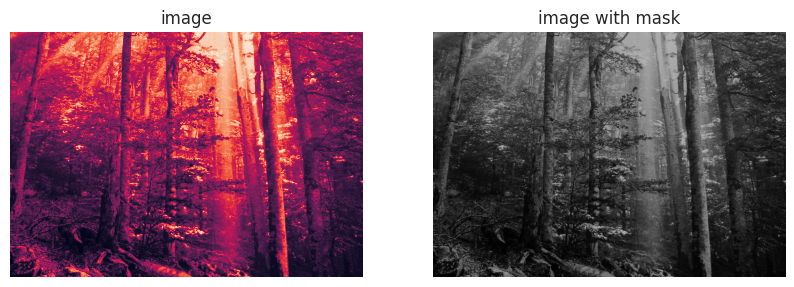

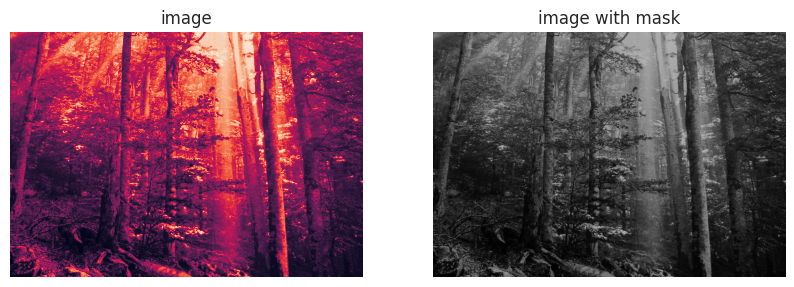

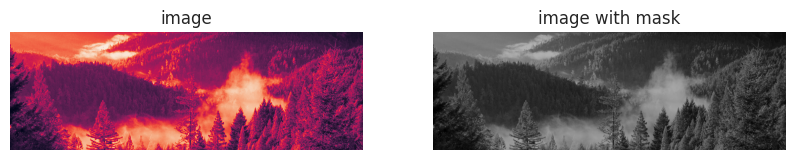

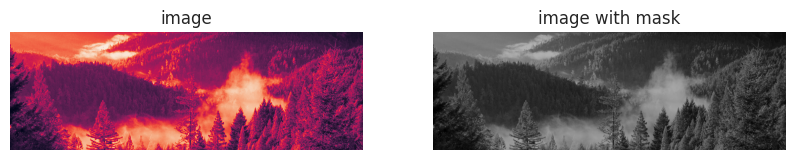

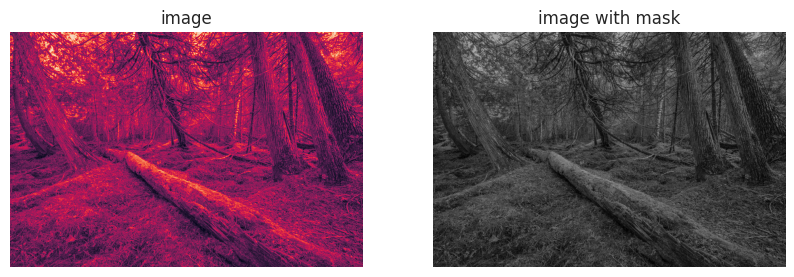

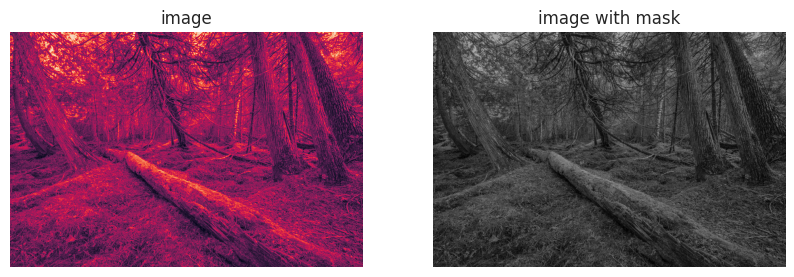

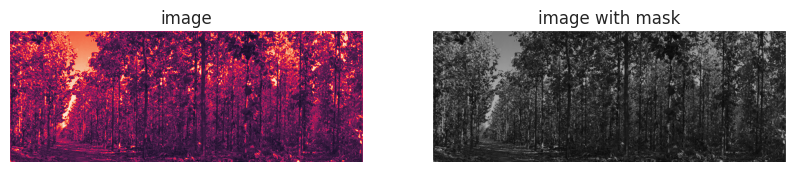

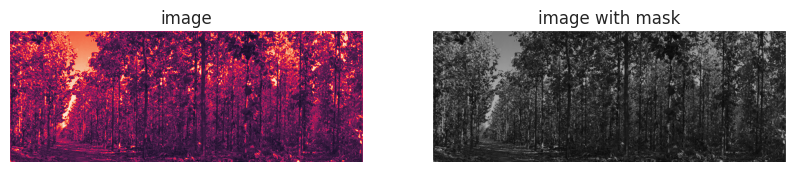

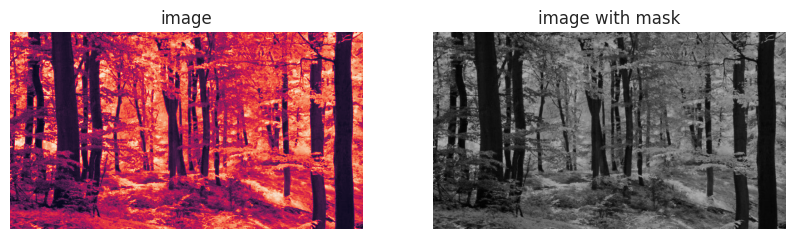

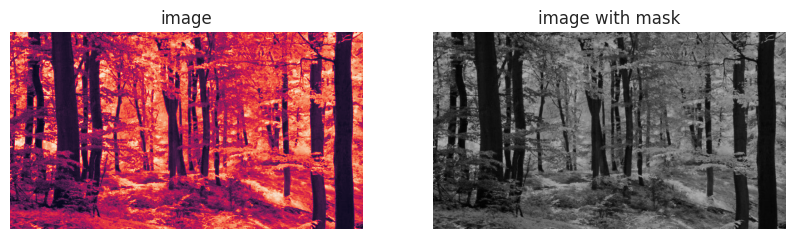

In [ ]:
for i in range(10):
    display(display_list[i])

In [ ]:
import os
from zipfile import ZipFile

# Directorio de salida para las máscaras
output_dir = '/content/mask_folder'

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Crear una lista de rutas de máscaras
mask_paths = []

for i in range(len(df)):
    mask = rle_decode(rle=data['mask'][i], height=data['size'][i][0], width=data['size'][i][1])
    mask_path = os.path.join(output_dir, f'mask_{i}.png')
    io.imsave(mask_path, mask)
    mask_paths.append(mask_path)

# Comprimir las máscaras en un archivo zip
zip_file_path = '/content/mask_folder.zip'
with ZipFile(zip_file_path, 'w') as zipf:
    for mask_path in mask_paths:
        zipf.write(mask_path, os.path.basename(mask_path))

# Descargar el archivo zip
from google.colab import files
files.download(zip_file_path)


<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask_folder/mask_0.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask_folder/mask_1.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask_folder/mask_2.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask_folder/mask_3.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask_folder/mask_4.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask_folder/mask_5.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask_folder/mask_6.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-47-220aad175bf4>:16: UserWarning: /content/mask

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
from zipfile import ZipFile

# Directorio de salida para las máscaras
output_dir = '/content/mask_folder'

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Crear una lista de rutas de máscaras
mask_paths = []

for i in range(10):  # Aquí, asumo que solo estás descargando las primeras 10 máscaras
    mask = rle_decode(rle=masks[i], height=h, width=w)
    mask_path = os.path.join(output_dir, f'mask_{i}.png')
    io.imsave(mask_path, mask)
    mask_paths.append(mask_path)

# Comprimir las máscaras en un archivo zip
zip_file_path = '/content/mask_folder.zip'
with ZipFile(zip_file_path, 'w') as zipf:
    for mask_path in mask_paths:
        zipf.write(mask_path, os.path.basename(mask_path))

# Descargar el archivo zip
from google.colab import files
files.download(zip_file_path)


<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask_folder/mask_0.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask_folder/mask_1.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask_folder/mask_2.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask_folder/mask_3.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask_folder/mask_4.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask_folder/mask_5.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask_folder/mask_6.png is a low contrast image
  io.imsave(mask_path, mask)
<ipython-input-41-79a4d181d5eb>:16: UserWarning: /content/mask

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>